In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
from sklearn.cross_validation import train_test_split
%matplotlib inline

/Users/Vera/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv('data.csv', index_col=0)

In [23]:
data_train = pd.get_dummies(data, columns=['main_character', 'main_location']).dropna()
data_X = data_train.ix[:, data_train.columns != 'imdb_rating']
data_Y = data_train['imdb_rating']

In [4]:
from sklearn.linear_model import LinearRegression

In [27]:
lr = LinearRegression()
lr.fit(data_X, data_Y)
list(zip(data_X.columns, lr.coef_))

[('num_characters', 0.0033494979681175478),
 ('words_count', -7.170963666542474e-05),
 ('num_locations', -0.0036062424964218055),
 ('us_viewers_in_millions', 0.0022777060001314964),
 ('views', 4.2626381250437939e-06),
 ('imdb_votes', 0.0013117384062218667),
 ('main_character_Bart Simpson', 0.017824100413692277),
 ('main_character_Else', 0.031536676362785079),
 ('main_character_Homer Simpson', 0.023124816486920361),
 ('main_character_Lisa Simpson', 0.015165563484809857),
 ('main_character_Marge Simpson', -0.087651156748207781),
 ('main_location_Elsewhere', -0.061590850855497738),
 ("main_location_Moe's Tavern", -0.0613212074360713),
 ('main_location_Simpson Home', -0.045439872553399638),
 ('main_location_Springfield Elementary School', 0.047418241533899369),
 ('main_location_Springfield Nuclear Power Plant', 0.1209336893110691)]

In [26]:
from sklearn.linear_model import Lasso, Ridge
lasso = Lasso()
lasso.fit(data_X, data_Y)
list(zip(data_X.columns, lasso.coef_))

[('num_characters', 0.0),
 ('words_count', -4.5324758124054157e-05),
 ('num_locations', -0.0),
 ('us_viewers_in_millions', 0.0),
 ('views', 4.6101175359839328e-06),
 ('imdb_votes', 0.0013255818155103476),
 ('main_character_Bart Simpson', 0.0),
 ('main_character_Else', 0.0),
 ('main_character_Homer Simpson', 0.0),
 ('main_character_Lisa Simpson', 0.0),
 ('main_character_Marge Simpson', -0.0),
 ('main_location_Elsewhere', -0.0),
 ("main_location_Moe's Tavern", -0.0),
 ('main_location_Simpson Home', -0.0),
 ('main_location_Springfield Elementary School', 0.0),
 ('main_location_Springfield Nuclear Power Plant', 0.0)]

In [30]:
ridge = Ridge()
ridge.fit(data_X, data_Y)
list(zip(data_X.columns, ridge.coef_))

[('num_characters', 0.0033489861737695525),
 ('words_count', -7.1728286778440582e-05),
 ('num_locations', -0.0036111695395791119),
 ('us_viewers_in_millions', 0.0022590945717548888),
 ('views', 4.2597204511928023e-06),
 ('imdb_votes', 0.0013126468592500648),
 ('main_character_Bart Simpson', 0.017251822385973975),
 ('main_character_Else', 0.030756228660162258),
 ('main_character_Homer Simpson', 0.022610852278935282),
 ('main_character_Lisa Simpson', 0.014739508329689864),
 ('main_character_Marge Simpson', -0.085358411654743269),
 ('main_location_Elsewhere', -0.05987102046530296),
 ("main_location_Moe's Tavern", -0.055650491377543396),
 ('main_location_Simpson Home', -0.043984000722459157),
 ('main_location_Springfield Elementary School', 0.047479489070631167),
 ('main_location_Springfield Nuclear Power Plant', 0.11202602349467161)]

In [32]:
# Код 3.1 (1 балл)
alphas = np.arange(1, 500, 50)
coefs_lasso = np.zeros((alphas.shape[0], data_X.shape[1])) # матрица весов размера (число регрессоров) x (число признаков)
coefs_ridge = np.zeros((alphas.shape[0], data_X.shape[1]))
# Для каждого значения коэффициента из alphas обучите регрессор Lasso
# и запишите веса в соответствующую строку матрицы coefs_lasso (вспомните встроенную в python функцию enumerate),
# а затем обучите Ridge и запишите веса в coefs_ridge.
for i in range(len(alphas)): 
    a = alphas[i]
    lasso_reg = Lasso(alpha = a)
    lasso_reg.fit(data_X, data_Y)
    coefs_lasso[i]=lasso_reg.coef_
    
    ridge_reg = Ridge(alpha = a)
    ridge_reg.fit(data_X, data_Y)
    coefs_ridge[i]=ridge_reg.coef_

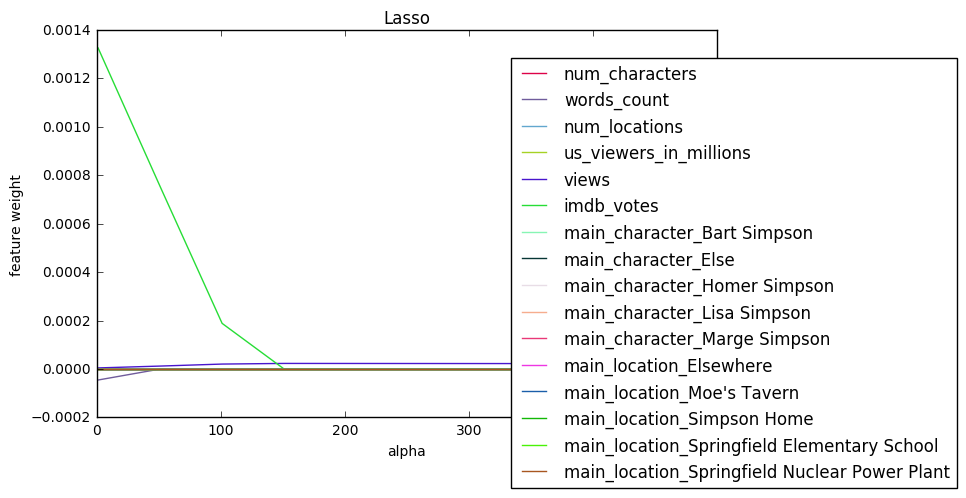

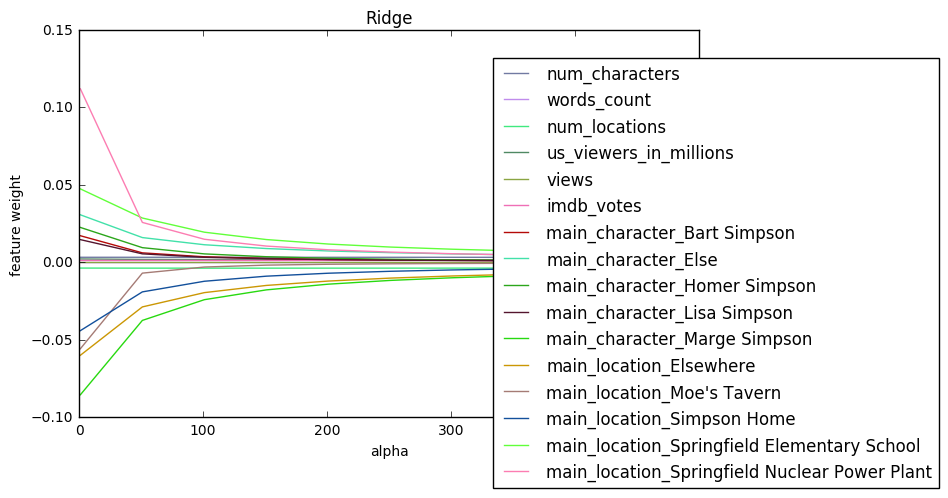

In [38]:
plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_lasso.T, data_X.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, data_X.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

In [39]:
from sklearn.linear_model import LassoCV

Выбранное альфа: 1

num_characters:		0.000
words_count:		-0.000
num_locations:		-0.000
us_viewers_in_millions:		0.000
views:		0.000
imdb_votes:		0.001
main_character_Bart Simpson:		0.000
main_character_Else:		0.000
main_character_Homer Simpson:		0.000
main_character_Lisa Simpson:		0.000
main_character_Marge Simpson:		-0.000
main_location_Elsewhere:		-0.000
main_location_Moe's Tavern:		-0.000
main_location_Simpson Home:		-0.000
main_location_Springfield Elementary School:		0.000


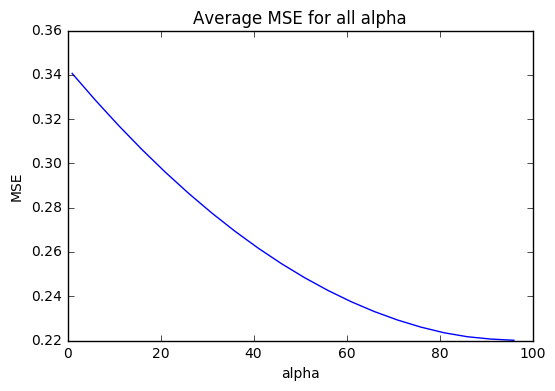

In [41]:
alphas = np.arange(1, 100, 5)
lassocv_reg = LassoCV(alphas = alphas)
lassocv_reg.fit(data_X, data_Y)

plt.figure()
mse_avg = lassocv_reg.mse_path_.mean(axis=1)
plt.plot(alphas, mse_avg)
plt.title("Average MSE for all alpha")
plt.xlabel("alpha")
plt.ylabel("MSE")

print ("Выбранное альфа: %d\n" % lassocv_reg.alpha_)

weights = zip(data_X.columns[:-1], lassocv_reg.coef_)
for w in weights:
    print ("%s:\t\t%.3f" % (w[0], w[1]))